## Домашнее задание №4. Работа с NPV моделью.

*Дата выдачи: 17.04.2024*

*Дедлайн: 08.05.2024 23:59*

### Задание №1. Построить распределение клиентов по кривым.
- Использовать DEF, CLO, DLQ кривые из прошлой домашки
- Интерполировать и экстраполировать кривые для каждого значения PA/PD
- PA – x_score из вашей домашки


### Задание №2. Добавить страховку в NPV модель.
- Страховка стоит 0.5% от лимита
- Подключена у 40% клиентов в статусе CUR и у 60% в статусе DLQ
- Возможно наступление страхового случая с вероятностью 0.1%, при подключенной страховке мы должны возместить всю сумму текущей задолженности


Вам нужно внести изменения в код ниже. Где – подсказывать не будем, это часть задания. Добавьте комментарий с указанием места, котороые вы поменяли.

# Задание №1. Построить распределение клиентов по кривым.

### Задание №1. Построить распределение клиентов по кривым.
- Использовать DEF, CLO, DLQ кривые из прошлой домашки
- Интерполировать и экстраполировать кривые для каждого значения PA/PD
- PA – x_score из вашей домашки

In [1]:
import pandas as pd
import plotly.graph_objects as go

Импортируем предварительно собранные данные в удобном формате

In [2]:
dat = pd.read_csv('./data/rat_forPdPa.csv', index_col='Unnamed: 0')
df = dat.loc[:24]

In [3]:
df.head()

,statement_num,clo2,clo0,clo1,def1,def2,def0,dlq1,dlq2,dlq0,pd0,pa0,pd1,pa1,pd2,pa2
0,0,0.131300,0.036567,0.063213,0.000000,0.000000,0.000000,0.080930,0.093169,0.049653,0.01104,0.13327,0.032685,0.220838,0.068209,0.379452
1,1,0.071280,0.023035,0.038785,0.000000,0.000000,0.000000,0.094359,0.112366,0.050524,0.01104,0.13327,0.032685,0.220838,0.068209,0.379452
2,2,0.069366,0.021749,0.037045,0.000000,0.000000,0.000000,0.108358,0.125986,0.056117,0.01104,0.13327,0.032685,0.220838,0.068209,0.379452
3,3,0.065896,0.023714,0.038277,0.027486,0.036797,0.014466,0.091966,0.122891,0.044224,0.01104,0.13327,0.032685,0.220838,0.068209,0.379452
4,4,0.065068,0.024044,0.038292,0.006254,0.009121,0.002481,0.095932,0.129885,0.046448,0.01104,0.13327,0.032685,0.220838,0.068209,0.379452


Рассмотрим 2 промежутка:
- от 0 до значения pd/pa по 2 бакету(индекс 1): вычисляется по тенденции 1 и 2 бакета по формуле из семинара
- от значения pd/pa 2 бакета до 1: вычисляется по тенденции 2 и 3 бакета по формуле из семинара  

Подаем значения(param: values) pd/pa(param: mode), и отрисовываем для каждого из значений кривую dlq/def/clo(param: name)

In [4]:
def calc_curve(dat, val, mode, name):
    '''
    Вычисляем значения кривой в зависмости от значения pd/pa для каждого statement_num
    '''
    if val > dat[f'{mode}1'].mean():
        curve = dat[name+str(1)] + (dat[name+str(2)] - dat[name+str(1)]) / (dat[mode+str(2)] - dat[mode+str(1)]) * (val - dat[mode+str(1)])
    else:
        curve = dat[name+str(0)] + (dat[name+str(1)] - dat[name+str(0)]) / (dat[mode+str(1)] - dat[mode+str(0)]) * (val - dat[mode+str(0)])
    return curve.clip(0, 1)

def plot_curves(dat, values, mode='pd', name='dlq'):
    '''
    Рисуем кривые
    '''
    fig = go.Figure()

    for val in values:
        curve = calc_curve(dat, val, mode, name)
        fig.add_trace(go.Scatter(x=curve.index, y=curve.values, mode='lines', name=f"{mode} = {val}"))

    for i in range(3):
        fig.add_trace(go.Scatter(x=dat.index, y=dat[name+str(i)], mode='lines', line=dict(dash='dash'), name=f"{name}{i} (actual)"))

    fig.update_layout(
        title=f"Кривая {name}",
        xaxis_title="Месяц жизни клиента",
        yaxis_title="Значение",
        title_font_size=20,
        xaxis=dict(title_font_size=15, tickfont_size=14),
        yaxis=dict(title_font_size=15, tickfont_size=14),
        legend=dict(
            title='',
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=1
        ),
        height=800,
        width=1300
    )

    fig.show()

Отрисуем все кривые для самих бакетов, промежуточных значений, 3 бакета + 0.1 и максимального значения(1)

In [5]:
md = 'pa'
name_cv = 'def'
av0 = df[f'{md}0'].mean()
av1 = df[f'{md}1'].mean()
av2 = df[f'{md}2'].mean()
span0_1 = av0 + (av1-av0)/2
span1_2 = av1 + (av2-av1)/2
span2 = av2 + 0.1
max_val = 1
plot_curves(df, [av0, av1, av2, span0_1, span1_2, span2, max_val], name=name_cv, mode=md)

In [6]:
md = 'pd'
name_cv = 'def'
av0 = df[f'{md}0'].mean()
av1 = df[f'{md}1'].mean()
av2 = df[f'{md}2'].mean()
span0_1 = av0 + (av1-av0)/2
span1_2 = av1 + (av2-av1)/2
span2 = av2 + 0.1
plot_curves(df, [av0, av1, av2, span0_1, span1_2, span2, max_val], name=name_cv, mode=md)

In [7]:
md = 'pa'
name_cv = 'dlq'
av0 = df[f'{md}0'].mean()
av1 = df[f'{md}1'].mean()
av2 = df[f'{md}2'].mean()
span0_1 = av0 + (av1-av0)/2
span1_2 = av1 + (av2-av1)/2
span2 = av2 + 0.1
plot_curves(df, [av0, av1, av2, span0_1, span1_2, span2, max_val], name=name_cv, mode=md)

In [8]:
md = 'pd'
name_cv = 'dlq'
av0 = df[f'{md}0'].mean()
av1 = df[f'{md}1'].mean()
av2 = df[f'{md}2'].mean()
span0_1 = av0 + (av1-av0)/2
span1_2 = av1 + (av2-av1)/2
span2 = av2 + 0.1
plot_curves(df, [av0, av1, av2, span0_1, span1_2, span2, max_val], name=name_cv, mode=md)

In [9]:
md = 'pa'
name_cv = 'clo'
av0 = df[f'{md}0'].mean()
av1 = df[f'{md}1'].mean()
av2 = df[f'{md}2'].mean()
span0_1 = av0 + (av1-av0)/2
span1_2 = av1 + (av2-av1)/2
span2 = av2 + 0.1
plot_curves(df, [av0, av1, av2, span0_1, span1_2, span2, max_val], name=name_cv, mode=md)

In [10]:
md = 'pd'
name_cv = 'clo'
av0 = df[f'{md}0'].mean()
av1 = df[f'{md}1'].mean()
av2 = df[f'{md}2'].mean()
span0_1 = av0 + (av1-av0)/2
span1_2 = av1 + (av2-av1)/2
span2 = av2 + 0.1
plot_curves(df, [av0, av1, av2, span0_1, span1_2, span2, max_val], name=name_cv, mode=md)

Напишем функцию, вычисляющую кривую, учитывая и pd и pa одновременно (вычисляется как среднее их двух по 4 промежуткам: 2 по pd и 2 по pa)  
PS: Изначально хотел замудрить, но потом понял, что самое надежное, и проще объяснимое - среднее

In [11]:
def calc_curve_withPdPa(dat, pd, pa, name):
    '''
    Вычисляем значения кривой в зависмости от значений pd и pa для каждого statement_num
    '''
    if pd > dat[f'pd1'].mean():
        curve1 = dat[name+str(1)] + (dat[name+str(2)] - dat[name+str(1)]) / (dat['pd2'] - dat['pd1']) * (pd - dat['pd1'])
    else:
        curve1 = dat[name+str(0)] + (dat[name+str(1)] - dat[name+str(0)]) / (dat['pd1'] - dat['pd0']) * (pd - dat['pd0'])

    if pa > dat[f'pa1'].mean():
        curve2 = dat[name+str(1)] + (dat[name+str(2)] - dat[name+str(1)]) / (dat['pa2'] - dat['pa1']) * (pa - dat['pa1'])
    else:
        curve2 = dat[name+str(0)] + (dat[name+str(1)] - dat[name+str(0)]) / (dat['pa1'] - dat['pa0']) * (pa - dat['pa0'])

    return ((curve1 + curve2)/2).clip(0, 1)

def plot_curves_withPdPa(dat, pds, pas, name='dlq', height=600, width=1000):
    '''
    Рисуем кривые
    '''
    fig = go.Figure()

    for pd_val in pds:
        for pa_val in pas:
            curve = calc_curve_withPdPa(dat, pd_val, pa_val, name)
            fig.add_trace(go.Scatter(x=curve.index, y=curve.values, mode='lines', name=f"pd = {pd_val:.3f}, pa = {pa_val:.3f}"))

    for i in range(3):
        fig.add_trace(go.Scatter(x=dat.index, y=dat[name+str(i)], mode='lines', line=dict(dash='dash'), name=f"{name}{i} (actual)"))

    fig.update_layout(
        title=f"Кривая {name}",
        xaxis_title="Месяц жизни клиента",
        yaxis_title="Значение",
        title_font_size=20,
        xaxis=dict(title_font_size=15, tickfont_size=14),
        yaxis=dict(title_font_size=15, tickfont_size=14),
        legend=dict(
            title='',
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=1
        ),
        height=800,
        width=1300
    )

    fig.show()

In [12]:
md1 = 'pd'
name_cv = 'clo'
av0_1 = df[f'{md1}0'].mean()
av1_1 = df[f'{md1}1'].mean()
av2_1 = df[f'{md1}2'].mean()
span0_1_1 = av0_1 + (av1_1-av0_1)/2
span1_2_1 = av1_1 + (av2_1-av1_1)/2
span2_1 = av2_1 + 0.1
md2 = 'pa'
av0_2 = df[f'{md2}0'].mean()
av1_2 = df[f'{md2}1'].mean()
av2_2 = df[f'{md2}2'].mean()
span0_1_2 = av0_2 + (av1_2-av0_2)/2
span1_2_2 = av1_2 + (av2_2-av1_2)/2
span2_2 = av2_2 + 0.1
plot_curves_withPdPa(df, [av0_1, av1_1, av2_1, span0_1_1, span1_2_1, span2_1, max_val], [av0_2, av1_2, av2_2, span0_1_2, span1_2_2, span2_2, max_val], name=name_cv)

In [13]:
md1 = 'pd'
name_cv = 'def'
av0_1 = df[f'{md1}0'].mean()
av1_1 = df[f'{md1}1'].mean()
av2_1 = df[f'{md1}2'].mean()
span0_1_1 = av0_1 + (av1_1-av0_1)/2
span1_2_1 = av1_1 + (av2_1-av1_1)/2
span2_1 = av2_1 + 0.1
md2 = 'pa'
av0_2 = df[f'{md2}0'].mean()
av1_2 = df[f'{md2}1'].mean()
av2_2 = df[f'{md2}2'].mean()
span0_1_2 = av0_2 + (av1_2-av0_2)/2
span1_2_2 = av1_2 + (av2_2-av1_2)/2
span2_2 = av2_2 + 0.1
plot_curves_withPdPa(df, [av0_1, av1_1, av2_1, span0_1_1, span1_2_1, span2_1], [av0_2, av1_2, av2_2, span0_1_2, span1_2_2, span2_2], name=name_cv)

In [14]:
md1 = 'pd'
name_cv = 'dlq'
av0_1 = df[f'{md1}0'].mean()
av1_1 = df[f'{md1}1'].mean()
av2_1 = df[f'{md1}2'].mean()
span0_1_1 = av0_1 + (av1_1-av0_1)/2
span1_2_1 = av1_1 + (av2_1-av1_1)/2
span2_1 = av2_1 + 0.1
md2 = 'pa'
av0_2 = df[f'{md2}0'].mean()
av1_2 = df[f'{md2}1'].mean()
av2_2 = df[f'{md2}2'].mean()
span0_1_2 = av0_2 + (av1_2-av0_2)/2
span1_2_2 = av1_2 + (av2_2-av1_2)/2
span2_2 = av2_2 + 0.1
plot_curves_withPdPa(df, [av0_1, av1_1, av2_1, span0_1_1, span1_2_1, span2_1], [av0_2, av1_2, av2_2, span0_1_2, span1_2_2, span2_2], name=name_cv)

# Задание №2. Добавить страховку в NPV модель.

### Класс модели

1) Добавил 3 метода:
    - plot_distribution: рисует распределения в том виде (+-), что были на лекции
    - calc_curve_withPdPa: считает кривые (в зависимости что потребуется) def, clo, dlq относительно pd и pa одновременно как среднее по pd и pa
    - calc_dists: считает итерационно долю def, clo, dlq по их ratio или rate

2) Изменил 2 функции:
    - loss_calc: добавил стоимость страховых случаев. Подсчет данной потери записал в комментах функции.
    - profit_calc: добавил доходы от страховок клиентов, подсчет также в функцие

3) Изменил инит
    - добавил датафрейм с def, clo, dlq относительно pd и pa, для их дальнейшей интерполяции/экстрополяции
    - Сделал максимальный срок NPV изменяемым (был 101)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class NPVModel:
    avg_missed_payments = 1.5
    recovery = 0.50
    dlq_penalty_amount = 500
    oper_costs = 100
    collection_costs = 600
    tax_rate = 0.20
    discounting_rate = 0.30
    eq_req = 0.125
    cost_of_funds = 0.16
    acquisition_cost = 1000

    insurance_cost_percent = 0.005 # Доля от стоимости лимита
    prob_insurance_case = 0.001 # Вероятность страхового случая
    percent_cur_with_insurance = 0.4 # Доля cur, у которых подключена страховка
    percent_dlq_with_insurance = 0.6 # Доля dlq, у которых подключена страховка

    def __init__(self, dat, max_term):
        '''
        Инициализация
        :param dat: Датафрейм Pandas с dlq, clo, def, pa, pd(из дз3).
        :param max_term: Максимальный срок.
        '''
        self.dat = dat.copy()
        n = len(dat)
        for _ in range(n, max_term-1):
            self.dat.loc[len(self.dat)] = self.dat.loc[len(self.dat)-1]
        self.dat = self.dat.loc[:max_term-1]
        self.max_term = max_term

    def model_balance_calculations(self, amount, rate, term):
        '''
        Расчет модельных баланса, выплаченных процентов, регулярного платежа
        :param amount: Сумма кредита
        :param rate: Ставка
        :param term: Срок
        :return:
        balance : np.array(101) : остаток тела долга по кредиту на каждый месяц
        interest : np.array(101) : выплата по процентам каждый месяц
        regular_payment : float : размер регулярного платежа
        '''

        regular_payment = round(amount * (rate / 12) *\
                                (1 + (rate / 12)) / (1 - ((1 + rate / 12) ** (-term))))
        # График баланса и процентов
        balance = np.zeros(self.max_term+1)
        interest = np.zeros(self.max_term+1)
        balance[0] = amount

        for i in range(1, term + 1):
            int_payment = balance[i - 1] * rate / 12
            debt_payment = regular_payment - int_payment
            balance[i] = max(0, round(balance[i - 1] - debt_payment))
            interest[i] = int_payment
        return balance, interest, regular_payment

    def distribution_calc(self, pd, pa, term): #!
        '''
        Расчет распределения по статусам
        :param pd: вероятность выпасть к дефолт к 12-му месяцу
        :param pa: вероятность полного досрочного погашения к 6-му месяцу
        :param term: срок кредита
        :return:
        act_dist : np.array(101) : доля клиентов в статусе ACT на каждый месяц
        dlq_dist : np.array(101) : доля клиентов в статусе CUR на каждый месяц
        cur_dist : np.array(101) : доля клиентов в статусе DLQ на каждый месяц
        def_dist : np.array(101) : доля клиентов в статусе DEF на каждый месяц
        '''
        # Считаем предсказания dlq, clo, def, act для необходимых pd и pa по известным нам значениям из датасета
        dlq_ratio = self.calc_curve_withPdPa(self.dat, pd, pa, 'dlq')
        clo_rate = self.calc_curve_withPdPa(self.dat, pd, pa, 'clo')
        def_rate = self.calc_curve_withPdPa(self.dat, pd, pa, 'def')

        # Считаем dist исходя из ratio и rate
        act_dist, dlq_dist, clo_dist, def_dist = self.calc_dists(dlq_ratio, clo_rate, def_rate)

        cur_dist = act_dist - dlq_dist

        # После срока все, кто не clo становятся def
        act_dist[term+1:] = 0
        dlq_dist[term+1:] = 0
        cur_dist[term+1:] = 0
        def_dist[term+1:] = 1-clo_dist[term]
        return act_dist, dlq_dist, cur_dist, def_dist

    def cur_balance_calc(self, model_balance, cur_dist):
        '''
        Расчет модельного баланса в статусе CUR
        :param model_balance: плановый график баланса
        :param cur_dist: доля клиентов в статусе CUR на каждый месяц
        :return:
        principal_balance_cur : np.array(101) : principal balance в статусе CUR
        gross_balance_cur : np.array(101) : gross balance в статусе CUR
        '''
        principal_balance_cur = model_balance*cur_dist
        gross_balance_cur = model_balance*cur_dist
        return principal_balance_cur, gross_balance_cur

    def dlq_balance_calc(self, model_balance, regular_payment, dlq_dist):
        '''
        Расчет модельного баланса в статусе DLQ
        :param model_balance: плановый график баланса
        :param regular_payment: размер регулярного платежа
        :param dlq_dist: доля клиентов в статусе DLQ на каждый месяц
        :return:
        principal_balance_dlq : np.array(101) : principal balance в статусе DLQ
        gross_balance_dlq : np.array(101) : gross balance в статусе DLQ
        '''
        principal_balance_dlq = np.append(model_balance[1:], model_balance[-1])*dlq_dist
        gross_balance_dlq = (model_balance + regular_payment*self.avg_missed_payments)*dlq_dist
        return principal_balance_dlq, gross_balance_dlq

    def act_balance_calc(self, principal_balance_cur, principal_balance_dlq, gross_balance_cur, gross_balance_dlq):
        '''
        Расчет модельного баланса в статусе ACT
        :param principal_balance_cur: principal balance в статусе CUR
        :param principal_balance_dlq: principal balance в статусе DLQ
        :param gross_balance_cur: principal balance в статусе CUR
        :param gross_balance_dlq: principal balance в статусе DLQ
        :param dlq_dist: доля клиентов в статусе DLQ на каждый месяц
        :return:
        principal_balance_act : np.array(101) : principal balance в статусе ACT
        gross_balance_act : np.array(101) : gross balance в статусе ACT
        '''
        principal_balance_act = principal_balance_cur + principal_balance_dlq
        gross_balance_act = gross_balance_cur + gross_balance_dlq
        return principal_balance_act, gross_balance_act

    def def_balance_calc(self, model_balance, regular_payment, def_dist):
        '''
        Расчет модельного баланса в статусе DEF
        :param model_balance: плановый график баланса
        :param regular_payment: размер регулярного платежа
        :param def_dist: доля клиентов в статусе DEF на каждый месяц
        :return:
        principal_balance_def : np.array(101) : principal balance в статусе DEF
        gross_balance_def : np.array(101) : gross balance в статусе DEF
        '''
        principal_balance_def = np.zeros(self.max_term+1)
        gross_balance_def = np.zeros(self.max_term+1)

        def_dist_change = def_dist[4:] - def_dist[3:-1]
        principal_balance_def[4:] = np.cumsum(model_balance[:-4] * def_dist_change)
        gross_balance_def[4:] = np.cumsum((model_balance[4:] + 4 * regular_payment) * def_dist_change)

        return principal_balance_def, gross_balance_def

    def profit_calc(self, principal_balance_act, principal_balance_def, term, rate, dlq_dist, cur_dist): #!
        '''
        Рассчет доходов на каждый месяц
        :param principal_balance_act: principal balance в статусе ACT
        :param principal_balance_def: principal balance в статусе DEF
        :param term: срок кредита
        :param rate: ставка по кредиту
        :param dlq_dist: доля клиентов в статусе DLQ на каждый месяц
        :param cur_dist: доля клиентов в статусе CUR на каждый месяц
        :return:
        profit : np.array(101) : доход на каждый месяц
        '''
        interest_profit = principal_balance_act*rate/12
        penatly_profit = dlq_dist*self.dlq_penalty_amount

        new_def_balance = np.append(principal_balance_def[1:], 0) - principal_balance_def
        recovery_profit = new_def_balance*self.recovery

        # Умножаем процент стоимости страховки на всю сумму кредита и затем на долю клиентов с cur и dist, имеющих страховку.
        # Т.к. доля относительно всех клиентов, amount не придется считать только для cur и dlq
        insurance_profit = self.insurance_cost_percent * self.amount * (self.percent_cur_with_insurance * cur_dist + self.percent_dlq_with_insurance * dlq_dist)

        profit = interest_profit + recovery_profit + penatly_profit

        # Добавляем доход за оплату страховки клиентами
        profit += insurance_profit

        profit[term+1:] = 0

        return profit

    def loss_calc(self, gross_balance_act, principal_balance_def, term, act_dist, dlq_dist, def_dist): #!
        '''
        Рассчет расходов на каждый месяц
        :param gross_balance_act: gross balance в статусе ACT
        :param principal_balance_def: principal balance в статусе DEF
        :param term: срок кредита
        :param act_dist: доля клиентов в статусе ACT на каждый месяц
        :param dlq_dist: доля клиентов в статусе DLQ на каждый месяц
        :param def_dist: доля клиентов в статусе DEF на каждый месяц
        :return:
        loss : np.array(101) : лосс на каждый месяц
        '''
        oper_loss = np.append(act_dist[1:], 0)*self.oper_costs
        loan_loss =  principal_balance_def - np.append(0, principal_balance_def[:-1])
        collection_loss = (np.append(dlq_dist[1:], 0) + np.append(def_dist[1:], 0))*self.collection_costs

        prev_gross_balance_act = np.append(gross_balance_act[0], gross_balance_act[1:])
        cost_of_funds_loss = prev_gross_balance_act*(1 - self.eq_req)*self.cost_of_funds/12

        # Вычисляем долю клиентов с CUR
        cur_dist = act_dist - dlq_dist

        # Задолженность клиентов с DLQ
        gross_balance_DLQ = dlq_dist * (gross_balance_act / np.clip(act_dist, np.finfo(float).eps, 1))
        # Задолженность клиентов с CUR
        gross_balance_CUR = cur_dist * (gross_balance_act / np.clip(act_dist, np.finfo(float).eps, 1))

        # Умножаем вероятность страхового случая на сумму задолженносте доли клиентов с CUR и DLQ, имеющих страховку
        insurance_loss = self.prob_insurance_case * (gross_balance_DLQ * self.percent_dlq_with_insurance + gross_balance_CUR * self.percent_cur_with_insurance)

        loss = loan_loss + cost_of_funds_loss + oper_loss + collection_loss

        # Добавляем страховой случай в расходы
        loss += insurance_loss
        loss[term+1:] = 0

        return loss, loan_loss, cost_of_funds_loss, oper_loss, collection_loss

    def assets_liabilities_calc(self, gross_balance_act):
        '''

        :param gross_balance_act: gross balance в статусе ACT
        :return:
        assets : np.array(101) : активы в проекте
        eq_req_curve : np.array(101) : активы, обеспеченные капиталом
        fund_req_curve : np.array(101) : активы, обеспеченные фондами
        '''

        # assets
        assets = gross_balance_act

        #liabilities
        eq_req_curve = assets*self.eq_req
        fund_req_curve = assets*(1 - self.eq_req)

        return assets, eq_req_curve, fund_req_curve

    def niat_calc(self, profit, loss):
        '''
        Расчет NIAT
        :param profit: суммарный доход на каждый месяц
        :param loss: суммарный лосс на каждый месяц
        :return:
        nibt : np.array(101) : прибыль до налогообложения
        niat : np.array(101) : прибыль после налогообложения
        tax : np.array(101) : налог в каждом месяце
        '''

        nibt = profit - loss
        tax = nibt*self.tax_rate
        niat = nibt - tax

        return nibt, niat, tax

    def cashflow_calc(self, principal_balance_act, principal_balance_def, amount, profit,
                      cost_of_funds_loss, oper_costs, collection_costs, tax, niat, eq_req_curve, fund_req_curve):
        '''
        Расчет денежных потоков
        :param principal_balance_act: principal balance в статусе DEF
        :param principal_balance_def: principal balance в статусе DEF
        :param amount: срок кредита
        :param profit: доход на каждый месяц
        :param cost_of_funds_loss: лоссы на фондирование
        :param oper_costs: операционные расходы
        :param collection_costs: расходы на коллекшн
        :param tax: налог в каждом месяце
        :param niat: доход после налогообложения
        :param eq_req_curve: активы, обеспеченные капиталом
        :param fund_req_curve: активы, обеспеченные фондами
        :return:
        cf_to_client : np.array(101) : денежный поток к клиенту
        cf_to_shareholders : np.array(101) : денежный поток к акционерам
        cf_to_debtholders : np.array(101) : денежный поток к фондам
        cf_to_cost_and_tax : np.array(101) : денежный поток на косты и налоги
        '''
        # client
        delta_principal_balance_act = (np.append(0, principal_balance_act[:self.max_term]) - principal_balance_act)
        delta_principal_balance_def = (np.append(0, principal_balance_def[:self.max_term]) - principal_balance_def)
        repayments = delta_principal_balance_act - delta_principal_balance_def + profit
        cf_to_client = np.append(amount, -repayments[1:])

        # debtoholder
        fund_req_ch = fund_req_curve - np.append(fund_req_curve[0], fund_req_curve[:-1])
        fund_req_change = np.append(fund_req_curve[0], fund_req_ch[1:])
        cf_to_debtholders = cost_of_funds_loss - fund_req_change

        # shareholders
        eq_req_ch = eq_req_curve - np.append(eq_req_curve[0], eq_req_curve[:-1])
        cf_to_shareholders = niat - np.append(eq_req_curve[0], eq_req_ch[1:])

        # cost and tax
        cf_to_cost_and_tax = oper_costs + collection_costs + tax

        return cf_to_client, cf_to_shareholders, cf_to_debtholders, cf_to_cost_and_tax

    def npv_calc(self, pd, pa, amount, rate, term):
        '''
        Расчет NPV
        :param pd: вероятность дефолта к 12-ому месяцу
        :param pa: вероятность полного досрочного погашения к 6-ому месяцу
        :param amount: сумма кредита
        :param rate: ставка по кредиту
        :param term: срок кредита
        :return: npv: чистая приведенная стоимость кредита
        '''

        # Считаем балансы
        self.amount = amount
        model_balance, interest, regular_payment =  self.model_balance_calculations(amount, rate, term)

        # Считаем распределение
        act_dist, dlq_dist, cur_dist, def_dist = self.distribution_calc(pd, pa, term)

        # Считаем балансы
        principal_balance_cur, gross_balance_cur = self.cur_balance_calc(model_balance, cur_dist)
        principal_balance_dlq, gross_balance_dlq = self.dlq_balance_calc(model_balance, regular_payment, dlq_dist)
        principal_balance_act, gross_balance_act = self.act_balance_calc(principal_balance_cur, principal_balance_dlq, gross_balance_cur, gross_balance_dlq)
        principal_balance_def, gross_balance_def = self.def_balance_calc(model_balance, regular_payment, def_dist)

        # Считаем профиты
        profit = self.profit_calc(principal_balance_act, principal_balance_def, term, rate, dlq_dist, cur_dist)
        loss, loan_loss, cost_of_funds_loss, oper_loss, collection_loss = self.loss_calc(gross_balance_act, principal_balance_def,
                                                                                                                  term, act_dist, dlq_dist, def_dist)
        nibt, niat, tax = self.niat_calc(profit, loss)

        # Считаем активы и денежные потоки
        assets, eq_req_curve, fund_req_curve = self.assets_liabilities_calc(gross_balance_act)
        cf_to_client, cf_to_shareholders, cf_to_debtholders, cf_to_cost_and_tax =\
            self.cashflow_calc(principal_balance_act, principal_balance_def, amount, profit, cost_of_funds_loss, oper_loss, collection_loss,
                               tax, niat, eq_req_curve, fund_req_curve)

        # Считаем NPV
        disc_curve = np.array([1 / ((1 + self.discounting_rate) ** (i / 12.)) for i in range(self.max_term+1)])
        pv = np.round(np.sum(disc_curve * cf_to_shareholders)).astype(int)
        npv = pv - self.acquisition_cost

        return npv

    @staticmethod
    def plot_distribution(act_dist, dlq_dist, cur_dist, def_dist): #!
        '''
        Метод для отрисовки распределения act, dlq, cur, def в зависимости от месяца
        :param act_dist: доля act
        :param dlq_dist: доля dlq
        :param cur_dist: доля cur
        :param def_dist: доля def
        '''
        act_dist, dlq_dist, cur_dist, def_dist = act_dist[1:], dlq_dist[1:], cur_dist[1:], def_dist[1:]
        clo_dist = 1 - act_dist - def_dist
        num_statem = np.arange(1, len(def_dist) + 1)
        plt.figure(figsize=(14, 6))
        plt.stackplot(num_statem, def_dist, dlq_dist, cur_dist, clo_dist,
                           labels=['DEF', 'DLQ', 'CUR', 'CLO'],
                           colors=['#ffdd2c', '#e5ecff', '#f5f5f6', '#afafaf'])
        plt.title('Прогноз распределения по статусам для приведенного портфеля')
        plt.xlabel('Номер платежа')
        plt.ylabel('Вероятность нахождения по статусам')
        plt.yticks(np.linspace(0, 1, 11), ['{}%'.format(int(x * 100)) for x in np.linspace(0, 1, 11)])
        ticks = np.linspace(1, num_statem[-1], 24)
        rounded_ticks = np.round(ticks)
        plt.xticks(rounded_ticks)
        plt.xlim(1, num_statem[-1])
        plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.6), frameon=False)

        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        plt.subplots_adjust(left=0.02, right=0.98)
        plt.show()

    @staticmethod
    def calc_curve_withPdPa(dat, pd, pa, name): #!
        '''
        Вычисляем значения кривой в зависмости от значений pd и pa для каждого statement_num
        '''
        if pd > dat[f'pd1'].mean():
            curve1 = dat[name+str(1)] + (dat[name+str(2)] - dat[name+str(1)]) / (dat['pd2'] - dat['pd1']) * (pd - dat['pd1'])
        else:
            curve1 = dat[name+str(0)] + (dat[name+str(1)] - dat[name+str(0)]) / (dat['pd1'] - dat['pd0']) * (pd - dat['pd0'])

        if pa > dat[f'pa1'].mean():
            curve2 = dat[name+str(1)] + (dat[name+str(2)] - dat[name+str(1)]) / (dat['pa2'] - dat['pa1']) * (pa - dat['pa1'])
        else:
            curve2 = dat[name+str(0)] + (dat[name+str(1)] - dat[name+str(0)]) / (dat['pa1'] - dat['pa0']) * (pa - dat['pa0'])

        return ((curve1 + curve2)/2).clip(0, 1)

    @staticmethod
    def calc_dists(dlq_ratio, clo_rate, def_rate): #!
        '''
        Метод для вычисления доли act, dlq, cur, def в зависимости от месяца, исходя из ratio и rate
        '''
        n = len(dlq_ratio) + 1
        def_dist = np.zeros(n)
        clo_dist = np.zeros(n)
        dlq_dist = np.zeros(n)
        act_dist = np.ones(n)

        for i in range(1, n):
            def_dist[i] = def_rate[i - 1] * act_dist[i - 1] + def_dist[i - 1]
            clo_dist[i] = clo_rate[i - 1] * act_dist[i - 1] + clo_dist[i - 1]
            act_dist[i] = 1 - clo_dist[i] - def_dist[i]
            dlq_dist[i] = dlq_ratio[i - 1] * act_dist[i]

        return act_dist, dlq_dist, clo_dist, def_dist

### Задание №2. Добавить страховку в NPV модель.
- Страховка стоит 0.5% от лимита
- Подключена у 40% клиентов в статусе CUR и у 60% в статусе DLQ
- Возможно наступление страхового случая с вероятностью 0.1%, при подключенной страховке мы должны возместить всю сумму текущей задолженности

In [16]:
model = NPVModel(dat, 26)

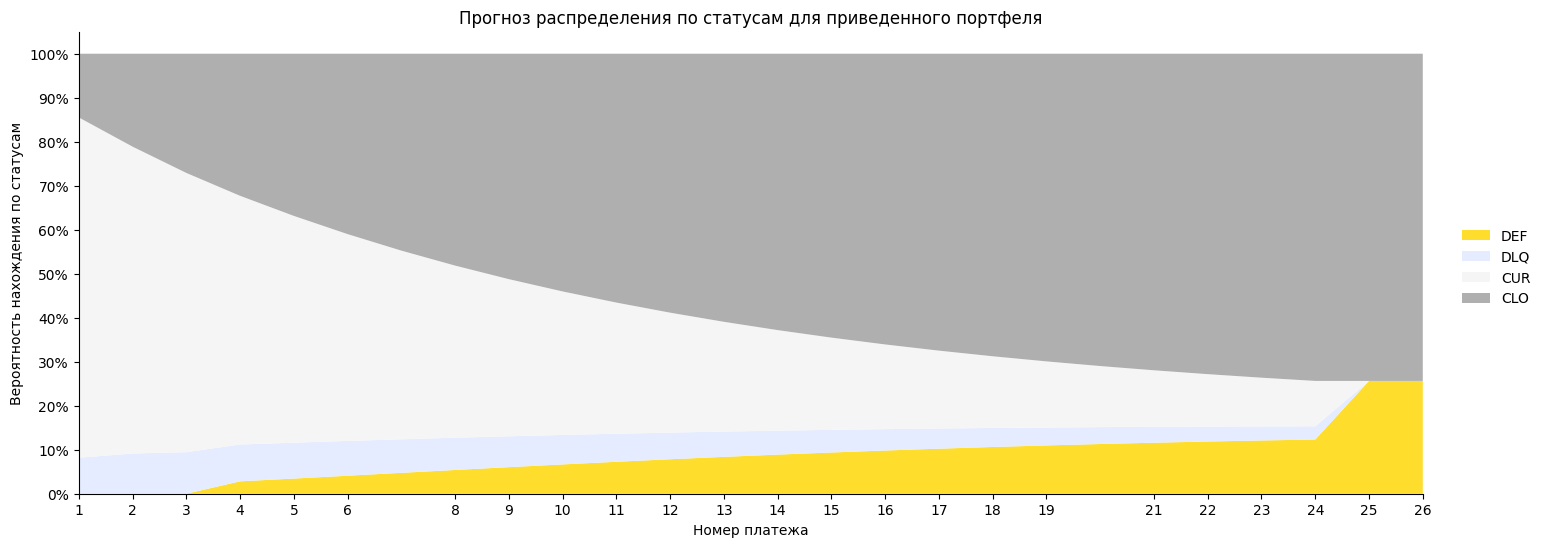

In [17]:
act_dist, dlq_dist, cur_dist, def_dist = model.distribution_calc(pd=0.1, pa=0.3, term=24)
model.plot_distribution(act_dist, dlq_dist, cur_dist, def_dist)

In [18]:
model.npv_calc(pd=0.1, pa=0.1, amount=500_000, term=12, rate=0.35)

38535

In [19]:
model.npv_calc(pd=0.1, pa=0.3, amount=500_000, term=12, rate=0.35)

29187

In [20]:
model.npv_calc(pd=0.3, pa=0.1, amount=500_000, term=12, rate=0.35)

14253

In [21]:
model.npv_calc(pd=0.3, pa=0.3, amount=500_000, term=12, rate=0.35)

10906

In [22]:
model.npv_calc(pd=0.05, pa=0.05, amount=500_000, term=12, rate=0.35)

53633

In [23]:
model.npv_calc(pd=0.05, pa=0.05, amount=1500_000, term=12, rate=0.45)

217831

In [24]:
model.npv_calc(pd=0.1, pa=0.3, amount=500_000, term=25, rate=0.25)

4374

pd или pa больше -> npv меньше. И наоборот...
  
Впринципе, звучит логично!)